In [1]:
# Set up packages for lecture. Don't worry about understanding this code, but
# make sure to run it if you're following along.
import numpy as np
import babypandas as bpd
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
import matplotlib.pyplot as plt
%reload_ext pandas_tutor
%set_pandas_tutor_options {'projectorMode': True}
set_matplotlib_formats("svg")
plt.style.use('fivethirtyeight')

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

from IPython.display import display, IFrame

def binning_animation():
    src="https://docs.google.com/presentation/d/e/2PACX-1vTnRGwEnKP2V-Z82DlxW1b1nMb2F0zWyrXIzFSpQx_8Wd3MFaf56y2_u3JrLwZ5SjWmfapL5BJLfsDG/embed?start=false&loop=false&delayms=60000"
    width=900
    height=307
    display(IFrame(src, width, height))

# Lecture 8 – Histograms and Overlaid Plots

## DSC 10, Summer 2022

### Announcements

- Homework 2 is due **tomorrow, 7/16 at 11:59pm**.
- Lab 3 is due on **Tue, 7/19 at 11:59pm**.
- Looking for more examples? Read the [course notes](https://notes.dsc10.com/front.html).
- Come to OH if you want help with the lab and homework problems!

### Agenda

- Histograms: Motivation.
- Density histograms.
- Overlaid plots.

### Review: types of visualizations

The type of visualization we create depends on the kinds of variables we're visualizing.

- **Scatter plot**: numerical vs. numerical.
    - Example: weight vs. height.
- **Line plot**: sequential numerical (time) vs. numerical.
    - Example: height vs. time.
- **Bar chart**: categorical vs. numerical.
    - Example: heights of all family members.
- **Histogram**: distribution of numerical.
    
**Note:** We may interchange the words "plot", "chart", and "graph"; they all mean the same thing.

## Histograms: Motivation

### Dataset of the top 200 songs on Spotify as of Sunday (4/10/22) 🎵

[Downloaded from here – check it out!](https://spotifycharts.com/regional)

In [2]:
charts = (bpd.read_csv('data/regional-global-daily-latest.csv')
          .set_index('rank')
          .get(['track_name', 'artist_names', 'streams'])
         )
charts

,track_name,artist_names,streams
rank,,,
1,Running Up That Hill (A Deal With God) - 2018 ...,Kate Bush,6225254
2,As It Was,Harry Styles,5937702
3,Me Porto Bonito,"Bad Bunny, Chencho Corleone",5199791
...,...,...,...
198,Balanço da Rede,"Matheus Fernandes, Xand Avião",732515
199,There's Nothing Holdin' Me Back,Shawn Mendes,730894
200,Nos Comemos (feat. Ozuna),"Tiago PZK, Ozuna",728521


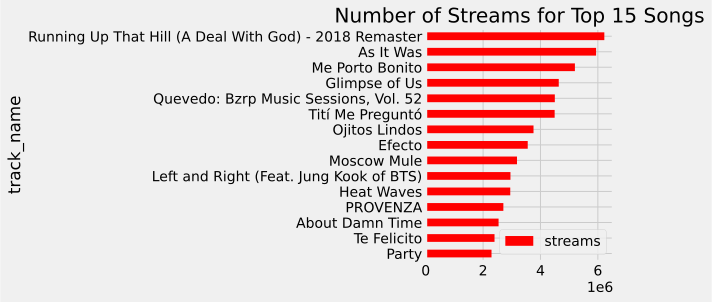

In [3]:
(charts
 .take(np.arange(15))
 .sort_values('streams')
 .plot(kind='barh',
       x='track_name',
       y='streams',
       title='Number of Streams for Top 15 Songs',
       color='red',
       figsize=(3,4))
);

Note the optional `title`, `color`, and `figsize` arguments.

### How do we visualize the distribution of the number of streams?

- **Question:** Can we use a bar chart? 

- **Answer:** No! 
    - Bar charts visualize the relationship between a categorical variable (e.g. song name) and numerical variable (e.g. streams).
    - In all of the bar charts we created, we had to pick a category for our labels.
        - With a bar chart, we can visualize the number of streams **per song**. 
    - If we're looking at just the number of streams, and ignoring all other columns, there's no "category".

### New idea: binning 🗑️

- Binning is the act of counting the number of numerical values that fall within ranges, called “bins”.
- A bin is defined by a left endpoint (lower bound) and right endpoint (upper bound).
- A value falls in a bin if it is **greater than or equal to the left** endpoint and **less than the right** endpoint.
    - [a, b): a is included, b is not.
- The width of a bin is its right endpoint minus its left endpoint.


In [4]:
binning_animation()

### Distribution of streams

- $x$-axis: streams (numerical).
- $y$-axis: a bar whose height encodes the number of songs that had about that many streams.

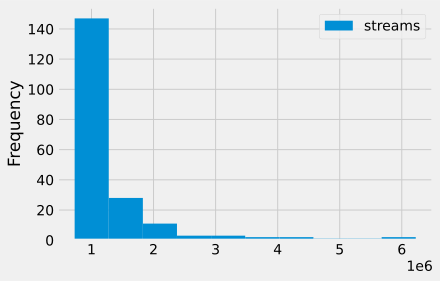

In [5]:
charts.plot(kind='hist', y='streams');

- 👀 It seems like the vast majority of songs on the charts have under 2 million streams, but some have more.
    - The `1e6` in the bottom right means "multiply this axis by a million", since $10^{6} = 1{,}000{,}000$.

### Plotting histograms

- **Histograms** (not bar charts!) visualize the distribution of a single numerical variable by placing numbers into bins.
- To create one from a DataFrame `df`, use
```py
df.plot(
    kind='hist', 
    y=column_name
)
```
- ⚠️ By default, the height of a bar is the *number* of values in the corresponding *bin*.
- Optional: specify the number of bins with `bins=`. Use `ec='w'` to see where bins start and end more clearly.

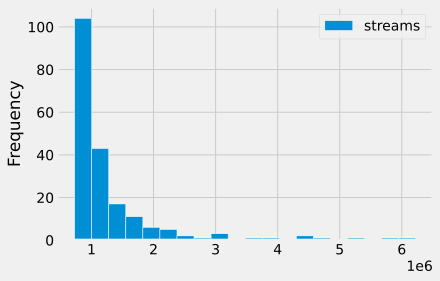

In [6]:
charts.plot(kind='hist', y='streams', bins=20, ec='w');

### Example: Number of songs per artist

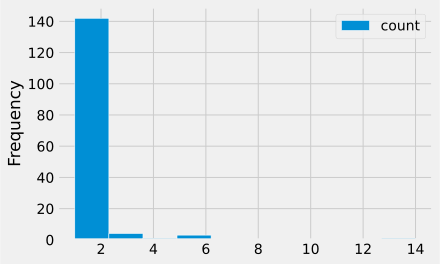

In [7]:
songs_per_artist = charts.groupby('artist_names').count().get(['streams'])
songs_per_artist = (songs_per_artist
                    .assign(count=songs_per_artist.get('streams'))
                    .drop(columns=['streams']))
songs_per_artist.plot(kind='hist', y='count', ec='w');

- Note: No more "1e6" in the bottom right!
     - We're now plotting number of songs, not number of streams.

### Custom bins

- We can specify our own bins with an array or list.
    - It's good to do this, so that we know where the bins start and end.
- `bins=np.arange(1, 9)` creates the bins [1, 2), [2, 3), [3, 4), [4, 5), [5, 6), [6, 7), and [7, 8].
    - **Important**: in a histogram, only the last bin is inclusive of the right endpoint!
- ⚠️ Data points not in any bin will not be included in the histogram.

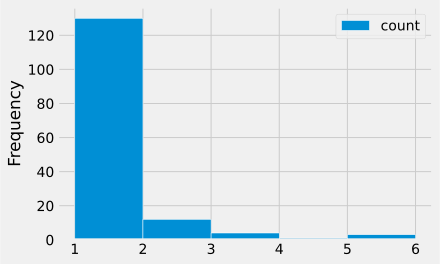

In [8]:
song_bins = np.arange(1, 7)
songs_per_artist.plot(kind='hist', y='count', ec='w', bins=song_bins);

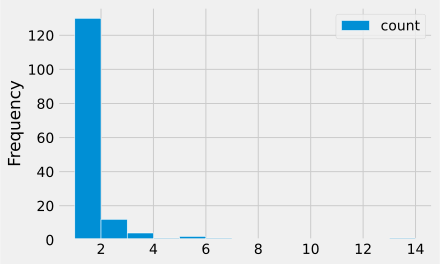

In [9]:
song_bins = np.arange(1, 15)
songs_per_artist.plot(kind='hist', y='count', ec='w', bins=song_bins);

- 👀 The vast majority of artists had only 1 or 2 songs on the charts, but Bad Bunny had 14!
- We'd say this distribution is **right-skewed** or **right-tailed**.

### Bin widths don't have to be uniform!

- When we set `bins=np.arange(1, 9)`, each bin has the same width (1).
- But we could make bins of varying widths.
- `bins=[1, 2, 3, 4, 6, 8]` creates the bins [1, 2), [2, 3), [3, 4), [4, 6), and [6, 8].

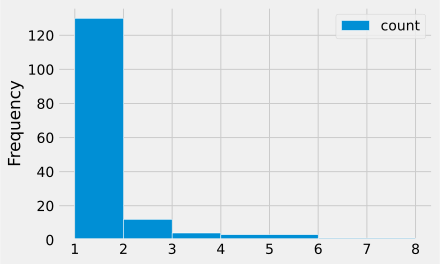

In [10]:
weird_bins = [1, 2, 3, 4, 6, 8]
songs_per_artist.plot(kind='hist', y='count', ec='w', bins=weird_bins);

<div class="menti">
<div>
    
### Discussion Question

Intuitively, what should happen to our histogram if we combine the bins [2, 3), [3, 4), and [4, 6) into one large bin [2, 6)?

A. The height of the bar for bin [2, 6) should be the sum of the heights of the three bars.

B. The height of the bar for bin [2, 6) should be the average of the heights of the three bars.

C. The area of the bar for bin [2, 6) should be the sum of the areas of the three bars.

D. More than one of the above.


</div>
<div>

### To answer, go to **[menti.com](https://www.menti.com/v42ge81t5d)** and enter the code 2863 3386 or use this QR code:

![](images/menti-qr.png)
    
</div>
</div>

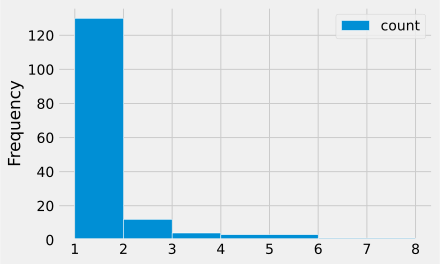

In [11]:
weirder_bins = [1, 2, 3, 4, 6, 8]
songs_per_artist.plot(kind='hist', y='count', ec='w', bins=weirder_bins);

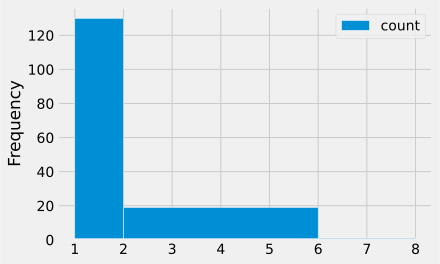

In [12]:
weirder_bins = [1, 2, 6, 8]
songs_per_artist.plot(kind='hist', y='count', ec='w', bins=weirder_bins);

### There's a problem... 🤔

- We know that there are ~130 artists with 1 song and ~15 artists with 2 songs.
- But with these new bins, it looks like there are lots of artists that had between 2-6 songs.
- **Takeaway:** Using bins with different widths is **misleading** if the $y$-axis is frequency (which is the default).

## Density histograms

### Solution: normalize bars by their width

- Use the `density=True` keyword argument to make a **density histogram**.
    - **Important:** We will **always** do this moving forward.

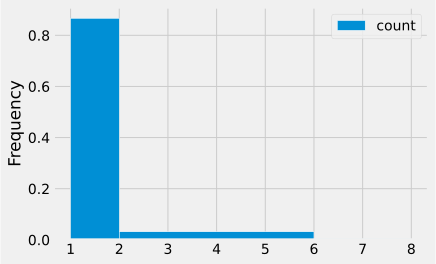

In [13]:
songs_per_artist.plot(kind='hist', y='count', ec='w',
                      bins=weirder_bins,
                      density=True);

What do you notice about this new histogram?

- The $y$-axis is now in decimals.
- The relative heights of the bins are now different.

### Areas are proportions!

- The **area** of a bar in a density histogram is equal to the proportion (percentage) of all data points that fall into that bin.
- **The total area of a density histogram is always 1 (100%)**.
- Proportions and percentages represent the same thing.
    - A proportion is a decimal between 0 and 1, a percentage is between 0\% and 100\%.
    - 0.34 means 34\%.

### How to calculate heights in a density histogram

$$\text{Area} = \text{Height} \times \text{Width}$$

That means

$$\text{Height} = \frac{\text{Area}}{\text{Width}} = \frac{\text{Proportion (or Percentage)}}{\text{Width}}$$

- Note that this means the units for height are "proportion per ($x$-axis unit)".

### Example calculation

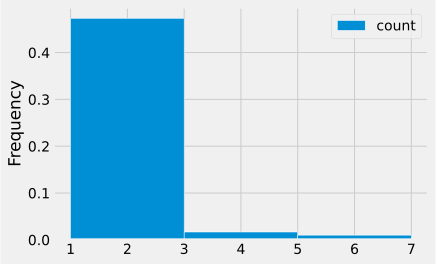

In [14]:
bins = [1, 3, 5, 7]
songs_per_artist.plot(kind='hist', y='count', ec='w',
                      bins=bins, density=True);

- The $y$-axis units here are "proportion per song", since the $x$-axis represents number of songs.
  - Unfortunately, the $y$-axis units on the histogram still display as "Frequency". **This is wrong!**
  - Can fix with `plt.ylabel(...)`
- Based on this histogram, what proportion of artists had between 1 or 3 songs in the top 200?

### Example calculation

- The height of the [1, 3) bar looks to be around 0.45.
    - Interpretation: 0.45 per song, or 45% per song.
- The width of the bin is 3 - 1 = 2 songs.

- Hence,

$$\text{Area} = \text{Height} \times \text{Width} = 0.45 \times 2 = 0.9$$

- Since areas = proportions, this means that the proportion of artists with 1 or 2 songs on the charts was roughly 0.9 (90\%).

In [15]:
# Let's check it
between_1_3 = songs_per_artist[(songs_per_artist.get('count') >= 1) &
                               (songs_per_artist.get('count') < 3)].shape[0]
between_1_3

142

In [16]:
total = songs_per_artist.shape[0]
total

151

In [17]:
between_1_3 / total

0.9403973509933775

This matches the result we got. (Not exactly, since we made a rough guess for the height.)

### 🌟 Important 🌟

**In this class, "histogram" will always mean "density histogram".** We will **only** use density histograms moving forward.

<div class="menti">
<div>
    
### Discussion Question

Suppose we created a density histogram of people's shoe sizes. 👟 Below are the bins we chose along with their heights.

| Bin | Height of Bar |
| --- | --- |
| [3, 7) | 0.05 |
| [7, 10) | 0.1 |
| [10, 12) | 0.15 |
| [12, 16] | $X$ |


What should the value of $X$ be so that this is a valid histogram?

A. 0.02

B. 0.05

C. 0.2

D. 0.5

E. 0.7

</div>
<div>

### To answer, go to **[menti.com](https://www.menti.com/v42ge81t5d)** and enter the code 2863 3386 or use this QR code:

![](images/menti-qr.png)
    
</div>
</div>


### Bar charts vs. histograms

Bar Chart | Histogram
---|---
1 categorical axis,  1 numerical axis | 2 numerical axes
Bars have arbitrary, but equal, widths and spacing | Horizontal axis is numerical and to scale
Lengths of bars are proportional to the numerical quantity of interest | Height measures density; areas are proportional to the proportion (percent) of individuals

## Overlaid plots

### New dataset: populations of San Diego and San Jose over time

The data for both cities was downloaded from [macrotrends.net](https://www.macrotrends.net/cities/23129/san-diego/population).

In [18]:
population = bpd.read_csv('data/sd-sj-2022.csv').set_index('date')
population

,Pop SD,Growth SD,Pop SJ,Growth SJ
date,,,,
1970,1209000,3.69,1009000,4.34
1971,1252000,3.56,1027000,1.78
1972,1297000,3.59,1046000,1.85
...,...,...,...,...
2020,3251000,0.62,1791000,0.45
2021,3272000,0.65,1799000,0.45
2022,3295000,0.70,1809000,0.56


### Recall: line plots

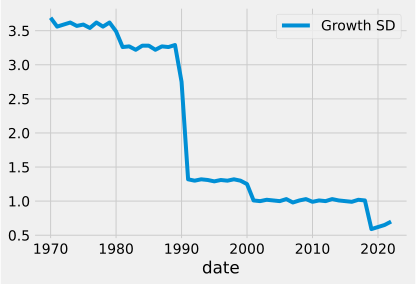

In [19]:
population.plot(kind='line', y='Growth SD');

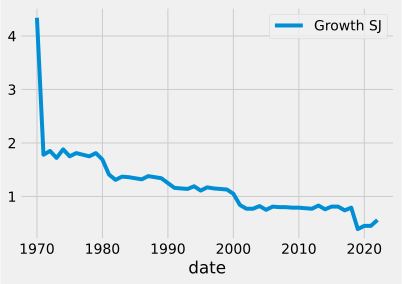

In [20]:
population.plot(kind='line', y='Growth SJ');

### Overlaying plots

- If `y=column_name` is omitted, all columns are plotted!

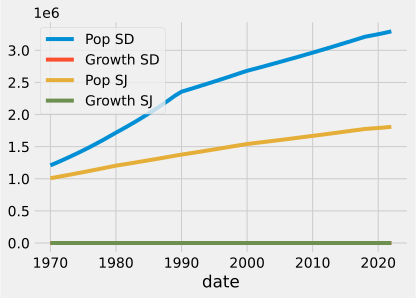

In [21]:
population.plot(kind='line');

### Selecting multiple columns at once
- To get multiple columns, use `.get([column_1, ..., column_k])`.
- Passing a list of column labels to `.get` returns a DataFrame.
    - `.get([column_name])` will return a DataFrame with just one column!

In [22]:
growths = population.get(['Growth SD', 'Growth SJ'])
growths

,Growth SD,Growth SJ
date,,
1970,3.69,4.34
1971,3.56,1.78
1972,3.59,1.85
...,...,...
2020,0.62,0.45
2021,0.65,0.45
2022,0.70,0.56


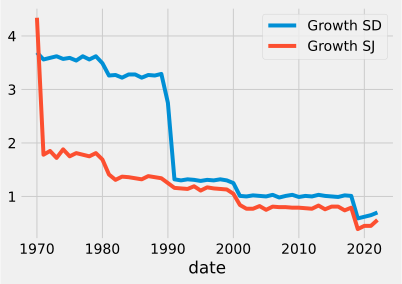

In [23]:
growths.plot(kind='line');

### To plot multiple graphs at once:
* `drop` all extraneous columns from your DataFrame.
    * Equivalently, `get` only the columns that contain information relevant to your plot.
* Specify the column for the $x$-axis (if not the index) in `.plot(x=column_name)`.
* `plot` will plot **all** other columns on a shared $y$-axis.

The same thing works for `barh`, `bar`, and `hist`, but not `scatter`.

## Example: Overlaid histograms

### New dataset: heights of children and their parents 👪 📏

- This data was collected by Francis Galton, a eugenicist and the creator of linear regression.
    - We will revisit this dataset later on in the course.
- We only need the `'father'`, `'mother'`, and `'childHeight'` columns for now.

In [24]:
heights = (bpd.read_csv('data/galton.csv')
           .get(['father', 'mother', 'childHeight']))
heights

,father,mother,childHeight
0,78.5,67.0,73.2
1,78.5,67.0,69.2
2,78.5,67.0,69.0
...,...,...,...
931,62.0,66.0,61.0
932,62.5,63.0,66.5
933,62.5,63.0,57.0


### Plotting overlaid histograms

- `alpha` controls how transparent the bars are (`alpha=1` is opaque, `alpha=0` is transparent).

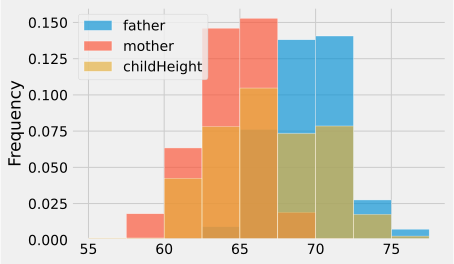

In [25]:
bins = np.arange(55, 80, 2.5)
heights.plot(kind='hist', density=True, ec='w',
             alpha=0.65, bins=bins);

### Too much going on...

It's too hard to read any of the individual histograms here. Let's just draw two, `'childHeight'` and `'mother'`.

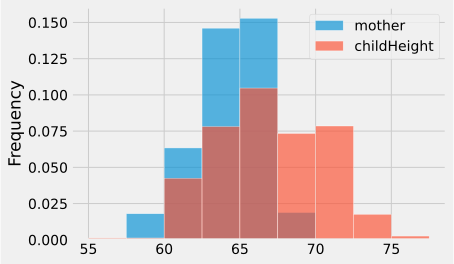

In [26]:
(heights
 .get(['mother', 'childHeight'])
 .plot(kind='hist', density=True, ec='w',
       alpha=0.65, bins=bins)
);

### Practice Questions

Try to answer these questions based on the overlaid histogram.

1. What proportion of children were between 70 and 75 inches tall?

2. What proportion of mothers were between 60 and 63 inches tall?

<h3>Answers</h3>
<details>
<summary>Click here to show.</summary>
    
<b>Question 1</b>
    
The height of the $[70, 72.5)$ bar is around $0.08$, meaning that $0.08 \cdot 2.5 = 0.2$ of children had heights in that interval. The height of the $[72.5, 75)$ bar is around $0.02$, meaning $0.02 \cdot 2.5 = 0.05$ of children had heights in that interval. Thus, the overall proportion of children who were between $70$ and $75$ inches tall was around $0.20 + 0.05 = 0.25$, or $25\%$.
    
To verify our answer, we can run

<code>heights[(heights.get('childHeight') >= 70) & (heights.get('childHeight') < 75)].shape[0] / heights.shape[0]</code>
    
<b>Question 2</b>
    
We can't tell. We could try and breaking it up into the proportion of mothers in $[60, 62.5)$ and $[62.5, 63)$, but we don't know the latter. In the absence of any additional information, we can't infer about the distribution of values within a bin. For example, it could be that everyone in the interval $[62.5, 65)$ actually falls in the interval  $[62.5, 63)$ - or it could be that no one does!

</details>

## Summary

### Summary

- Histograms (not bar charts!) are used to display the distribution of a numerical variable.
- We will always use density histograms.
    - In density histograms, the area of a bar represents the proportion (percentage) of values within its bin.
    - The total area of all bars is 1 (100%).
- We can overlay multiple line plots, bar charts, and histograms on top of one another to look at multiple relationships or distributions.
- **Next time**: More DataFrame manipulation.
    - Writing our own functions (Lab 3).